In [2]:
#some necessary libraries
import cv2
import numpy as np,sys
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [3]:
# Find the Gaussian pyramid of the two images and the mask
def generategaussian(img, num_levels):
    lower = img.copy()
    gaussian_pyr = [lower]
    for i in range(num_levels):
        lower = cv2.pyrDown(lower)
        gaussian_pyr.append(np.float32(lower))
    return gaussian_pyr

# Step-3
# Then calculate the Laplacian pyramid
def generatelaplacian(gaussian_pyr):
    laplacian_top = gaussian_pyr[-1]
    num_levels = len(gaussian_pyr) - 1
    
    laplacian_pyr = [laplacian_top]
    for i in range(num_levels,0,-1):
        size = (gaussian_pyr[i - 1].shape[1], gaussian_pyr[i - 1].shape[0])
        gaussian_expanded = cv2.pyrUp(gaussian_pyr[i], dstsize=size)
        laplacian = np.subtract(gaussian_pyr[i-1], gaussian_expanded)
        laplacian_pyr.append(laplacian)
    return laplacian_pyr

# Step-4
# Now blend the two images wrt. the mask
def blend(laplacian_A,laplacian_B,mask_pyr):
    LS = []
    for la,lb,mask in zip(laplacian_A,laplacian_B,mask_pyr):
        ls = lb * mask + la * (1.0 - mask)
        LS.append(ls)
    return LS


(512, 512, 3)
(512, 512, 3)



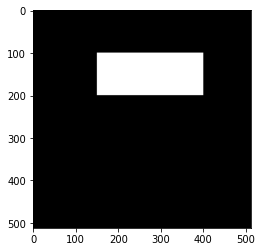

In [112]:
# Load the two images
img1 = cv2.imread('erkek.jpg')
img1 = cv2.resize(img1, (512,512))
img2 = cv2.imread('kadın.jpg')
img2 = cv2.resize(img2, (512,512))

print(img1.shape)
# Create the mask
mask = np.zeros((512,512,3), dtype='float32')
#selecting region on mask
mask[100:200,150:400,:] = (1,1,1)
plt.imshow(mask)
plt.savefig("maskvesikalık.jpg")
print(mask.shape)
print()

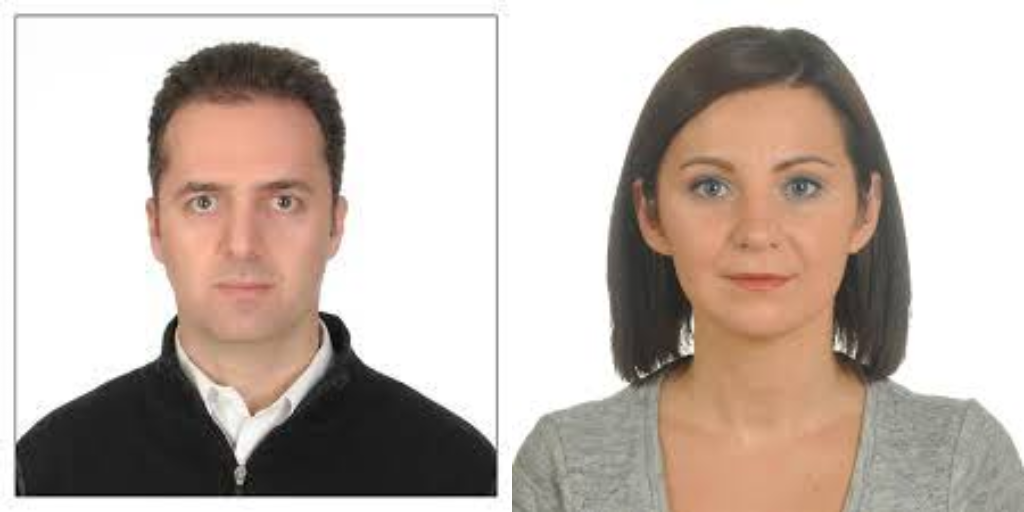

True

In [113]:
#lets look at images
resimg=cv2.hconcat([img1,img2])
cv2_imshow(resimg)
cv2.imwrite("vesikalıklar.jpg",resimg)

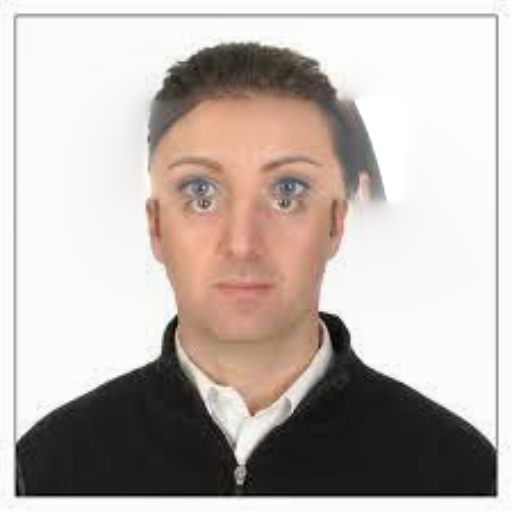

(512, 512, 3)


In [117]:
num_levels = 20
# For image-1, calculate Gaussian and Laplacian
gaussian_pyr_1 = generategaussian(img1, num_levels)
laplacian_pyr_1 = generatelaplacian(gaussian_pyr_1)
# For image-2, calculate Gaussian and Laplacian
gaussian_pyr_2 = generategaussian(img2, num_levels)
laplacian_pyr_2 = generatelaplacian(gaussian_pyr_2)
# Calculate the Gaussian pyramid for the mask image and reverse it.
mask_pyr_final = generategaussian(mask, num_levels)
mask_pyr_final.reverse()
# Blend the images
blended = blend(laplacian_pyr_1,laplacian_pyr_2,mask_pyr_final)
# Reconstruct the images
laplacian_top = blended[0]
laplacian_lst = [laplacian_top]
num_levels = len(blended) - 1
for i in range(num_levels):
    size = (blended[i + 1].shape[1], blended[i + 1].shape[0])
    laplacian_expanded = cv2.pyrUp(laplacian_top, dstsize=size)
    laplacian_top = cv2.add(blended[i+1], laplacian_expanded)
    laplacian_lst.append(laplacian_top)
# Save the final image to the disk
cv2_imshow(laplacian_lst[num_levels])
cv2.imwrite("res5,20.jpg",laplacian_lst[num_levels])
print(laplacian_lst[num_levels].shape)
#cv2.imwrite("all.jpg",cv2.hconcat_resize_min([img1,img2,laplacian_lst[num_levels]]))